In [11]:
import pandas as pd
import fsspec

github_fs = fsspec.filesystem('github', org= 'CSSEGISandData', repo='COVID-19', ref= 'master')

files_name = github_fs.ls('csse_covid_19_data/csse_covid_19_daily_reports_us')

dfs = []

for file_name in files_name:
  if file_name.endswith('.csv'):
    with github_fs.open(file_name, 'rb') as f:
      df = pd.read_csv(f)
      dfs.append(df)
data_frame = pd.concat(dfs)

In [12]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61614 entries, 0 to 57
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Province_State        61614 non-null  object 
 1   Country_Region        61614 non-null  object 
 2   Last_Update           61595 non-null  object 
 3   Lat                   59472 non-null  float64
 4   Long_                 59472 non-null  float64
 5   Confirmed             61614 non-null  int64  
 6   Deaths                61614 non-null  int64  
 7   Recovered             15122 non-null  float64
 8   Active                15122 non-null  float64
 9   FIPS                  61595 non-null  float64
 10  Incident_Rate         59472 non-null  float64
 11  Total_Test_Results    36637 non-null  float64
 12  People_Hospitalized   5129 non-null   float64
 13  Case_Fatality_Ratio   49027 non-null  float64
 14  UID                   61614 non-null  float64
 15  ISO3                  61614

In [19]:
nombres = {
    'Province_State': 'Provincia_Estado',
    'Country_Region': 'Pais_Región',
    'Last_Update': 'Última_actualizacion',
    'Lat': 'Latitud',
    'Long_': 'Longitud',
    'Confirmed': 'Confirmado',
    'Deaths': 'Fallecidos',
    'Recovered': 'Recuperado',
    'Active': 'Activo',
    'FIPS': 'FIPS',
    'Incident_Rate': 'Tasa_de_incidente',
    'People_Tested': 'Población_Prueba',
    'People_Hospitalized': 'Personas_Hospitalizadas',
    'Case_Fatality_Ratio': 'Ratio_de_mortales_casos',
    'Testing_Rate': 'Tasa_de_pruebas',
    'Hospitalization_Rate': 'Tasa_de_hospitalización',
    'Date':'Fecha',
    'People_Tested':'Personas_probadas',
    'Mortality_Rate': 'Tasa_de_mortalidad'
}

data_frame = data_frame.rename(columns = nombres)

In [22]:
df_covid_confirmados = data_frame[['Provincia_Estado', 'Última_actualizacion', 'Confirmado']]
df_covid_fallecidos = data_frame[['Provincia_Estado', 'Última_actualizacion', 'Fallecidos']]
df_covid_recuperados = data_frame[['Provincia_Estado', 'Última_actualizacion', 'Recuperado']]

df_covid_confirmados = df_covid_confirmados.dropna(axis=0, how='any')
df_covid_fallecidos = df_covid_fallecidos.dropna(axis=0, how='any')
df_covid_recuperados = df_covid_recuperados.dropna(axis=0, how='any')

df_covid_confirmados = df_covid_confirmados.dropna(axis=0, how='any')

df_covid_recuperados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15112 entries, 0 to 57
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Provincia_Estado      15112 non-null  object 
 1   Última_actualizacion  15112 non-null  object 
 2   Recuperado            15112 non-null  float64
dtypes: float64(1), object(2)
memory usage: 472.2+ KB


#**Función para crear Gráficas**

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def realizar_grafica(df, columna):
  df['Última_actualizacion'] = pd.to_datetime(df['Última_actualizacion'])
  ultimo_dia = df[(df['Última_actualizacion'].dt.day == 31)&(df['Última_actualizacion'].dt.month == 12)]
  casos_año = ultimo_dia.groupby(['Provincia_Estado', ultimo_dia['Última_actualizacion'].dt.year])[columna].sum().reset_index()
  casos_año = casos_año.rename(columns = {'Última_actualizacion':'año'})
  max_casos = casos_año[columna].max()
  min_casos = casos_año[columna].min()

  sns.set(style="whitegrid")
  plt.figure(figsize=(12,6))
  sns.barplot(data=casos_año, x='Provincia_Estado',y=columna,hue='año')
  plt.axhline(y=max_casos, color='r', linestyle='--',label = f'Maximo de casos: {max_casos}')
  plt.axhline(y=min_casos, color='r', linestyle='--',label = f'Minimo de casos: {min_casos}')

  plt.ylabel('Casos')
  plt.xlabel('Estados')
  plt.xticks(rotation=90)
  plt.tight_layout()
  plt.show()



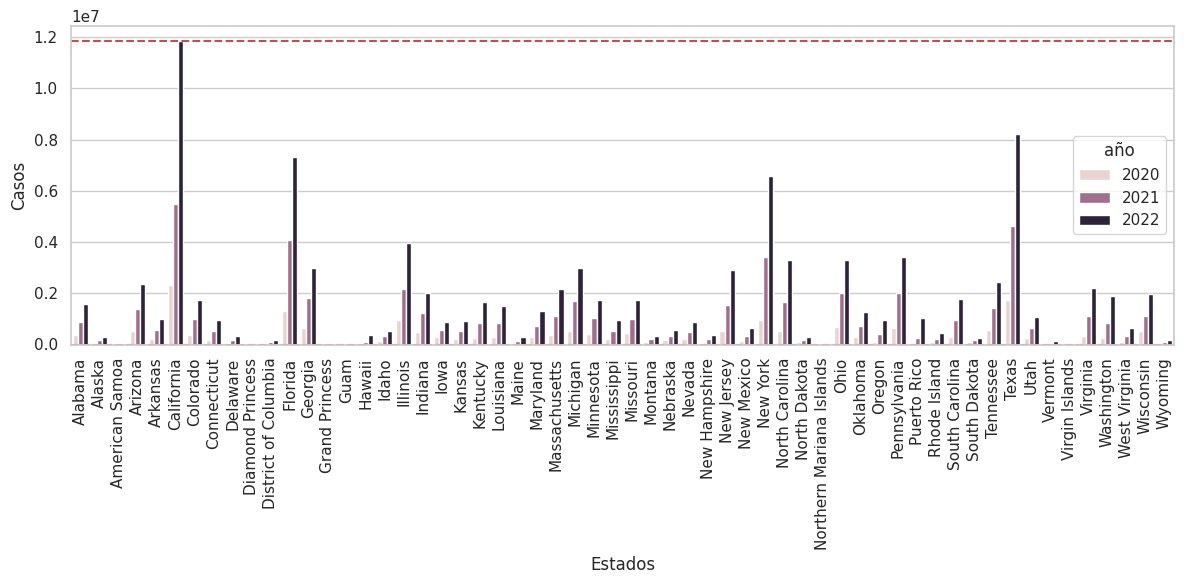

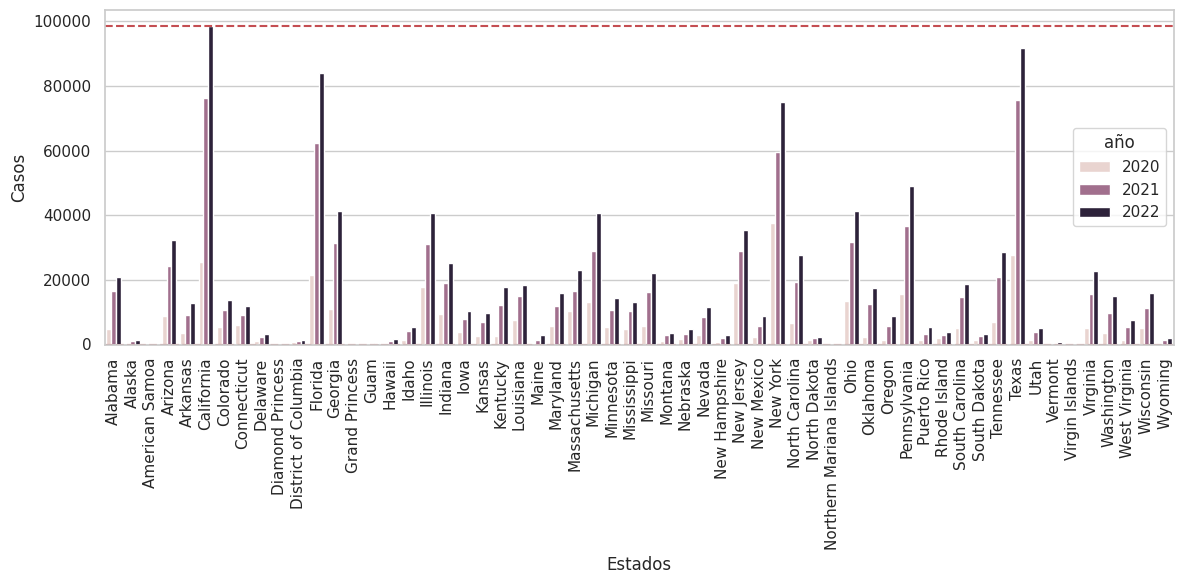

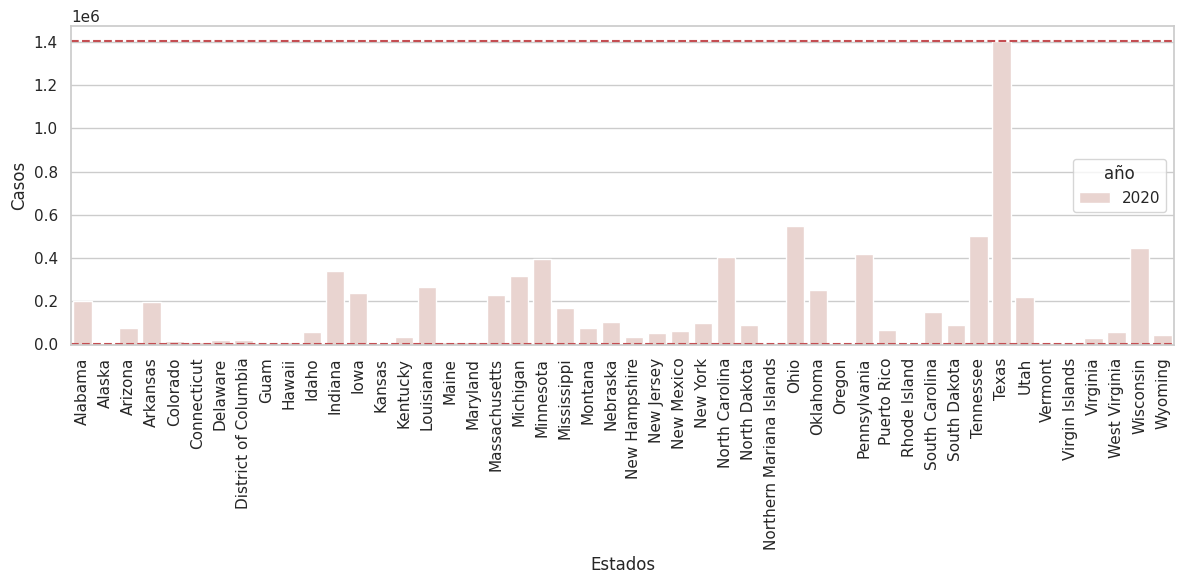

In [45]:
realizar_grafica(df_covid_confirmados, 'Confirmado')

realizar_grafica(df_covid_fallecidos, 'Fallecidos')

realizar_grafica(df_covid_recuperados, 'Recuperado')


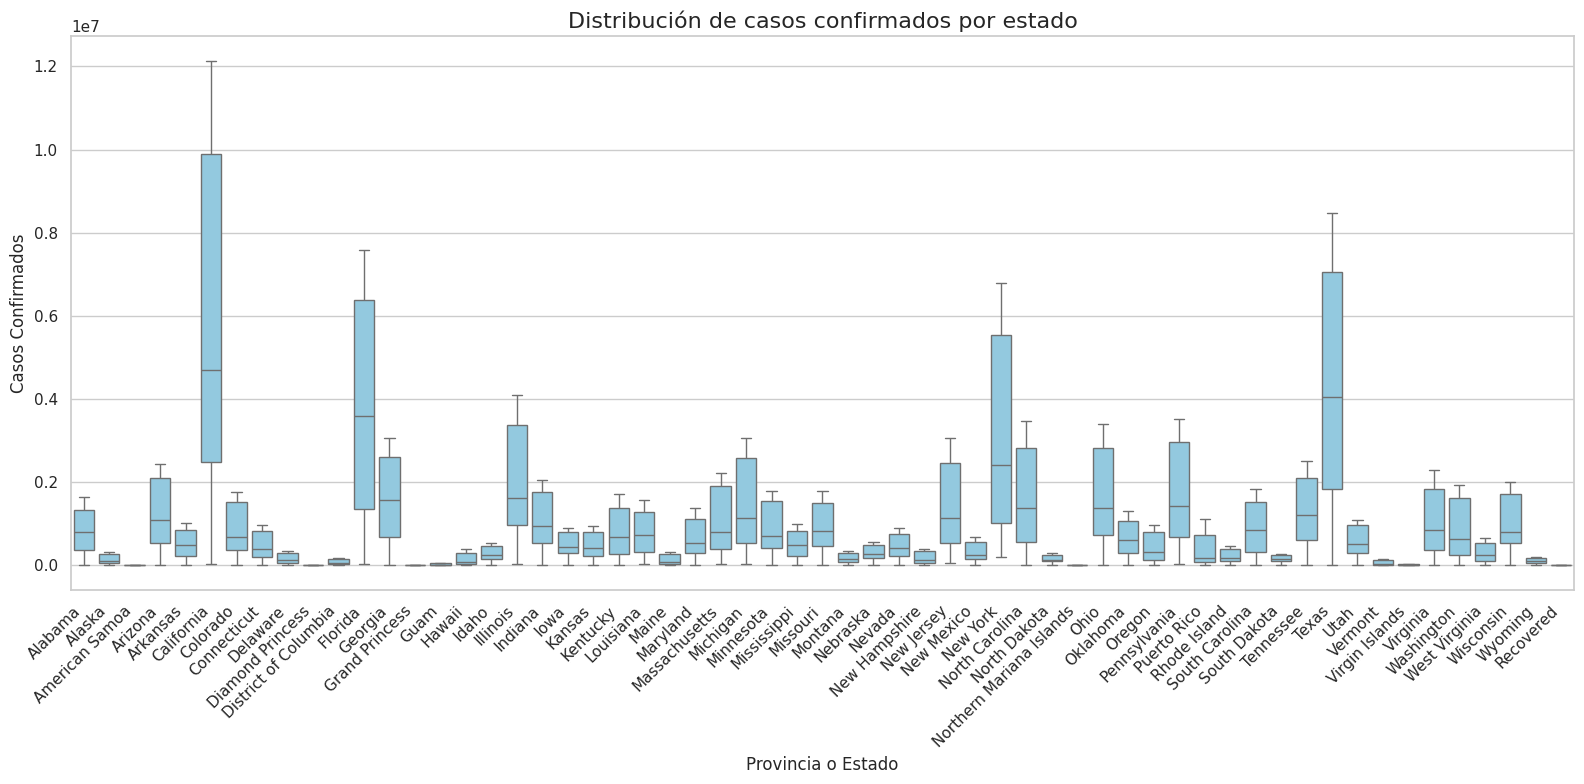

In [38]:
plt.figure(figsize=(16, 8))
sns.boxplot(data=df_covid_confirmados, x='Provincia_Estado', y='Confirmado', color="skyblue")
plt.title('Distribución de casos confirmados por estado', fontsize=16)
plt.xlabel('Provincia o Estado', fontsize=12)
plt.ylabel('Casos Confirmados', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

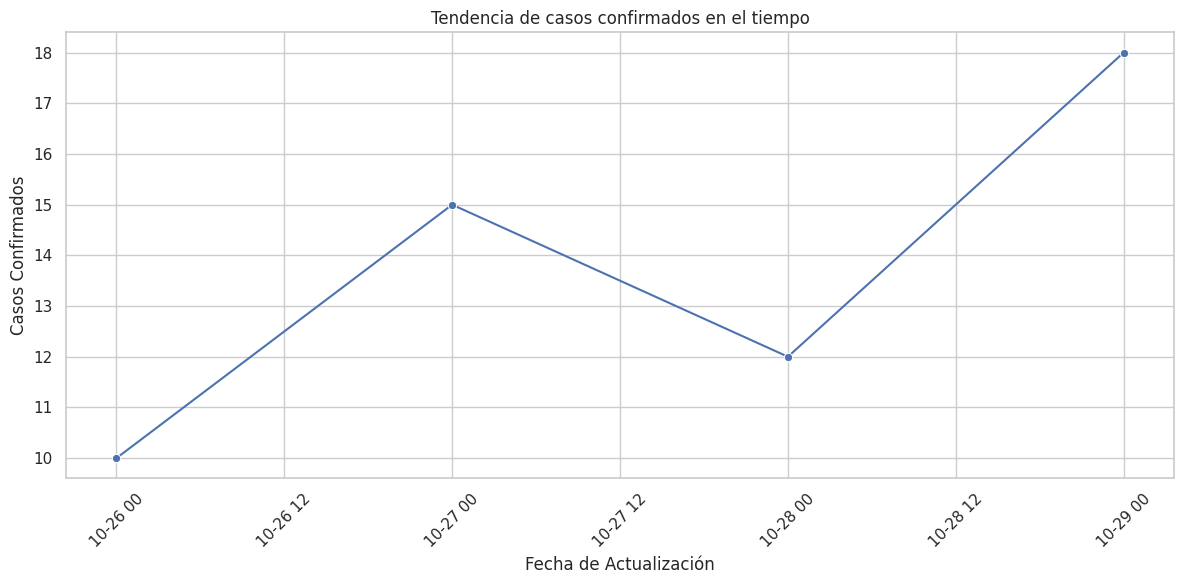

In [53]:
data = {'Última_actualizacion': pd.to_datetime(['2023-10-26', '2023-10-27', '2023-10-28', '2023-10-29']),
        'Confirmado': [10, 15, 12, 18]}
df_linea = pd.DataFrame(data)


plt.figure(figsize=(12, 6))
sns.lineplot(data=df_linea, x='Última_actualizacion', y='Confirmado', marker='o')
plt.title('Tendencia de casos confirmados en el tiempo')
plt.xlabel('Fecha de Actualización')
plt.ylabel('Casos Confirmados')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

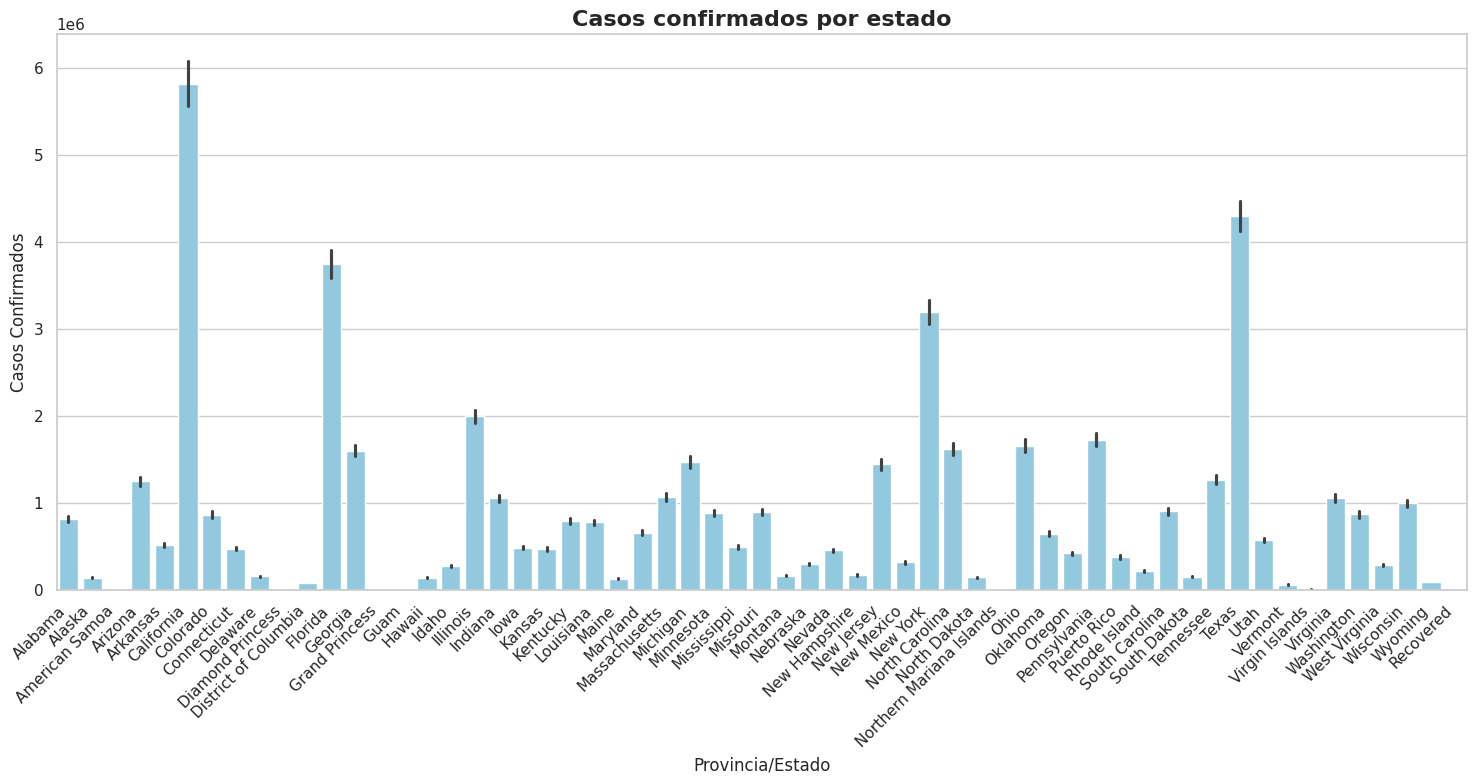

In [51]:
plt.figure(figsize=(15, 8))
sns.barplot(data=df_covid_confirmados, x='Provincia_Estado', y='Confirmado', color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.title('Casos confirmados por estado', fontsize=16, fontweight='bold')
plt.xlabel('Provincia/Estado', fontsize=12)
plt.ylabel('Casos Confirmados', fontsize=12)
plt.tight_layout()
plt.show()

<ipython-input-58-f792cfd35563>:15: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


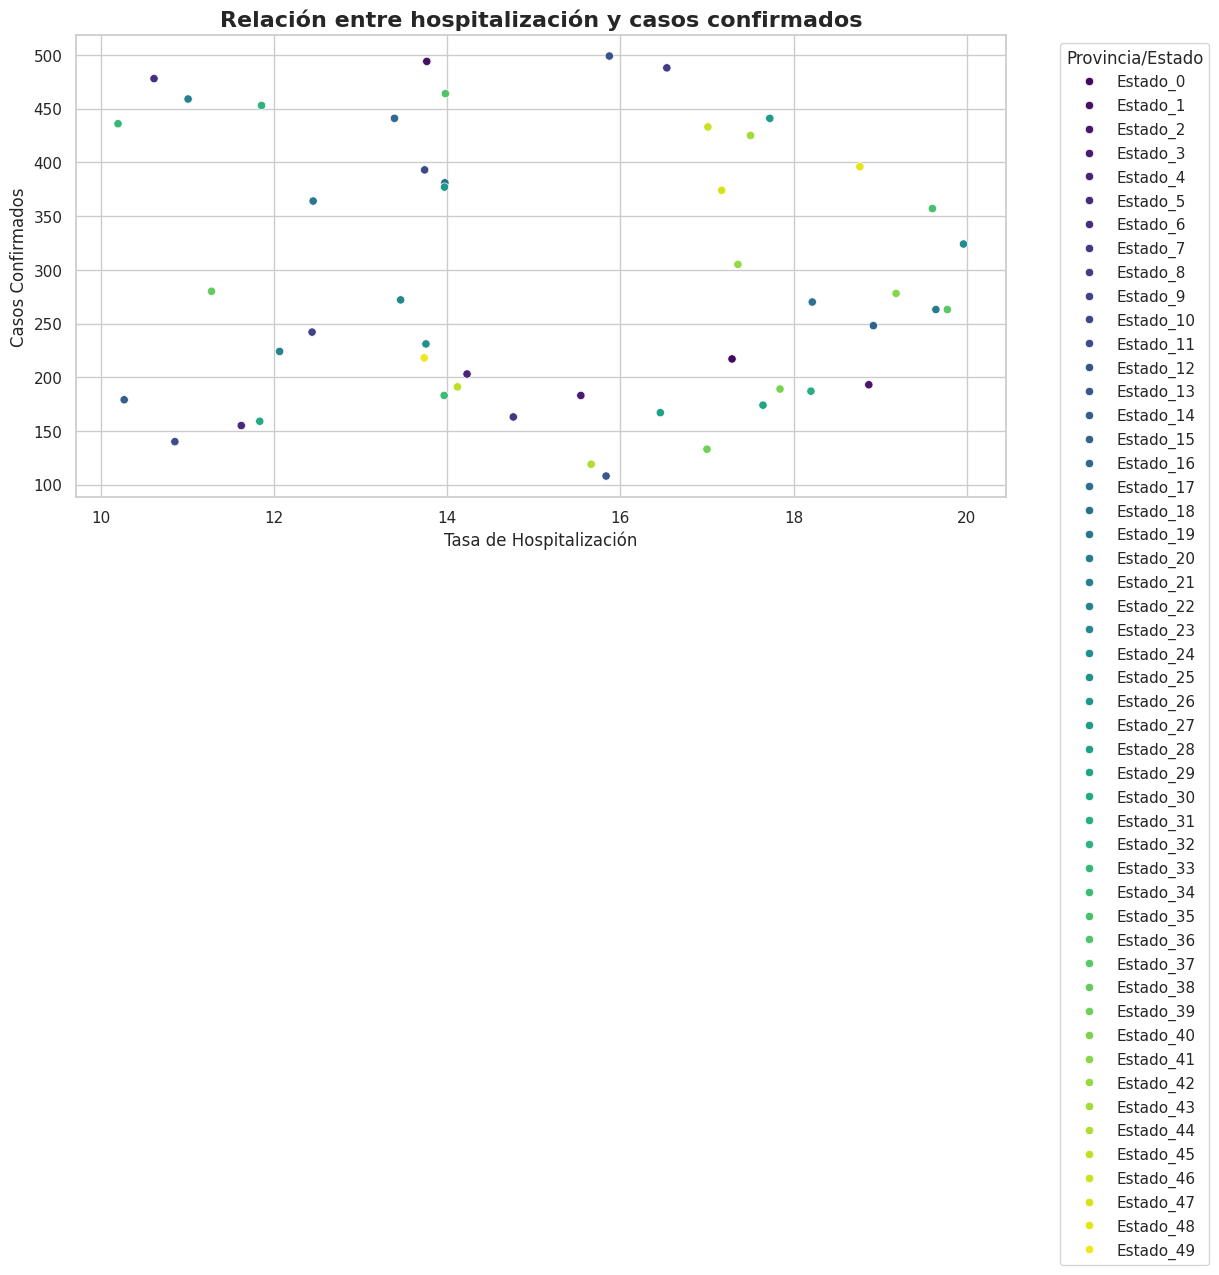

In [58]:
data_frame = pd.DataFrame({
    'Tasa_de_hospitalización': np.random.uniform(10, 20, 50),
    'Confirmado': np.random.randint(100, 500, 50),
    'Provincia_Estado': ['Estado_' + str(i) for i in range(50)]
})


plt.figure(figsize=(12, 6))
sns.scatterplot(data=data_frame, x='Tasa_de_hospitalización', y='Confirmado', hue='Provincia_Estado', palette='viridis')
plt.title('Relación entre hospitalización y casos confirmados', fontsize=16, fontweight='bold')
plt.xlabel('Tasa de Hospitalización', fontsize=12)
plt.ylabel('Casos Confirmados', fontsize=12)
plt.legend(title='Provincia/Estado', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

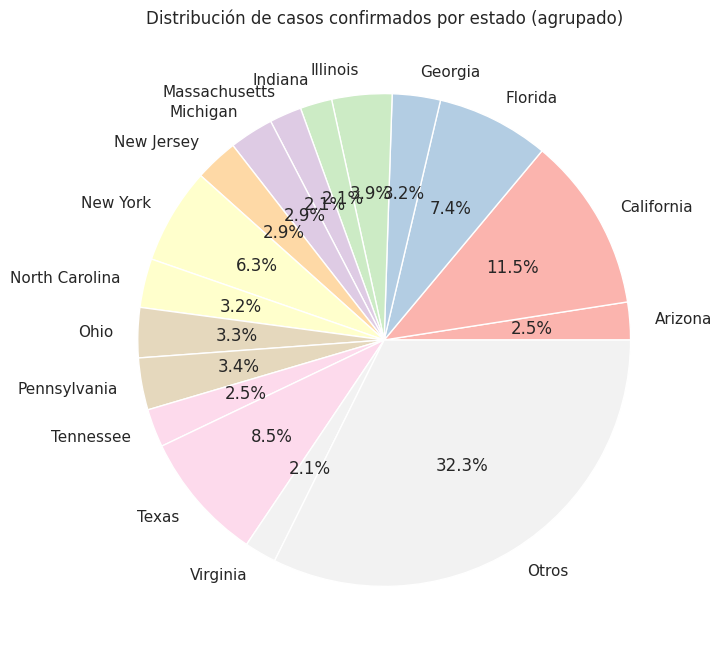

In [59]:
threshold = 0.02
df_pie = df_covid_confirmados.groupby('Provincia_Estado')['Confirmado'].sum()
df_pie_percentage = df_pie / df_pie.sum()

df_pie_reduced = df_pie[df_pie_percentage > threshold]
df_pie_reduced['Otros'] = df_pie[df_pie_percentage <= threshold].sum()

df_pie_reduced.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), cmap="Pastel1")
plt.title('Distribución de casos confirmados por estado (agrupado)')
plt.ylabel('')
plt.show()